# 2015 Yellow Taxi Trip Data

## Declare Libraries, Parameters and other helper functions that i made

In [45]:
#load libraries
import pandas as pd
import numpy as np
import json
import requests 
import os
import sys
import matplotlib.pyplot as plt
from sodapy import Socrata
from subprocess import call

#declare parameters
url="https://data.cityofnewyork.us/resource/2yzn-sicd.json"
%matplotlib inline

#declare environmental variable
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

#create function to download file but checks if file already exists
#def download_check(url,path):
#    name = url.split('/')[-1]
#    filename=path+"/"+name
#    if os.path.isfile(filename)==True:
        #loads from existing csv file and returns a pandas dataframe
#        print('File exists, Please proceed to the next step')
#    else:
#        download="wget "+url
#        unzip="gzip -d url > "+puidata
#        call(download)
#        call(unzip)
    
#create function to load a json file to pandas and creates a local copy if it hasn't been made
def json_to_pandas(url,path):
    #declare parameters
    name = url.split('/')[-1].replace(".json",".csv")
    filename=path+"/"+name
    #checks if local file exists
    if os.path.isfile(filename)==True:
        #loads from existing csv file and returns a pandas dataframe
        print('File exists, Please proceed to the next step')
        return pd.read_csv(filename,encoding='utf-8') 
    else:
        try:
            #json=pd.read_json(json_file,orient=)
            #js_file=pd.read_json(url)
            client = Socrata("data.cityofnewyork.us", None)
            results = client.get("2yzn-sicd",limit=500000)
            js_file = pd.DataFrame.from_records(results)
            try:
                print('exporting json to {}'.format(filename))
                js_file.to_csv(filename,header=True, index=False, encoding='utf-8')
                print('successfully downloaded into pandas dataframe and exported to csv')
            except:
                print("Pandas has encountered an error with exporting to csv")
            finally:
                return js_file
        except:
            print("Pandas has encountered an error with reading the json file")

# Download dataset
The dataset may take awhile to download as it's atleast 3.0 GB. The zipped file is being redirected at PUIdata.

In [56]:
#download_check("https://s3-us-west-2.amazonaws.com/nyctlc/yellow_tripdata_2015-01-06.csv.gz",puidata)
!wget -O - https://s3-us-west-2.amazonaws.com/nyctlc/yellow_tripdata_2015-01-06.csv.gz > $puidata/yellow_tripdata_2015-01-06.csv.gz

--2018-09-25 01:45:33--  https://s3-us-west-2.amazonaws.com/nyctlc/yellow_tripdata_2015-01-06.csv.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.209.40
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.209.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3056873154 (2.8G) [text/csv]
Saving to: ‘STDOUT’

-                   100%[===================>]   2.85G  11.3MB/s    in 5m 37s  

2018-09-25 01:51:10 (8.66 MB/s) - written to stdout [3056873154/3056873154]



# Unzip dataset
The dataset is being unzipped in the same folder (PUIdata)

In [59]:
!gzip -d $puidata/yellow_tripdata_2015-01-06.csv.gz

# Load dataset

In [ ]:
yellow_frame=pd.read_csv(puidata+'/yellow_tripdata_2015-01-06.csv',encoding='utf-8')

# Reduce dataset to two numerical columns

# Plot

## Extra Credit

## Load data

In [31]:
#checks if taxi data is already in the local directory, PUIData and loads it.
#Otherwise it downloads the json file and creates a local copy
taxi_data=json_to_pandas(url,puidata)

#returns number of rows in file
print("Number of rows included in the dataset " + str(len(taxi_data)) + ".")

Pandas has encountered an error with reading the json file


TypeError: object of type 'NoneType' has no len()

# Show the first eight rows of the dataset

In [21]:
taxi_data.head(8)

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-08-13T01:18:07.000,40.750469,-73.994621,0.5,5.0,0.3,0.5,1,1,2015-08-13T01:14:53.000,40.739738,-74.002136,1,N,1.26,0.0,7.56,0.87,2
1,2015-08-22T03:08:17.000,40.713573,-74.010872,0.5,7.5,0.3,0.5,1,1,2015-08-22T03:00:42.000,40.731010,-73.999680,1,N,1.75,0.0,10.55,1.50,1
2,2015-08-28T04:12:26.000,40.762718,-73.961067,0.5,9.0,0.3,0.5,1,2,2015-08-28T04:04:34.000,40.736710,-73.984802,1,N,0.00,0.0,10.30,2.47,2
3,2015-08-16T21:58:25.000,40.789371,-73.979111,0.5,5.0,0.3,0.5,1,1,2015-08-16T21:54:01.000,40.780659,-73.976486,1,N,1.58,0.0,7.88,0.85,2
4,2015-08-07T22:05:56.000,40.694054,-73.996376,0.5,16.0,0.3,0.5,1,1,2015-08-07T21:50:55.000,40.726871,-73.976913,1,N,3.45,0.0,20.75,4.60,1
5,2015-08-15T23:51:43.000,40.788300,-73.974548,0.5,5.0,0.3,0.5,1,1,2015-08-15T23:49:06.000,40.773994,-73.985107,1,N,3.00,0.0,9.30,1.20,1
6,2015-08-04T19:51:21.000,40.776188,-73.947517,1.0,22.5,0.3,0.5,2,1,2015-08-04T19:35:22.000,40.704319,-74.008980,1,N,4.00,0.0,28.30,7.30,1
7,2015-08-14T18:59:11.000,40.794273,-73.972000,1.0,9.5,0.3,0.5,1,2,2015-08-14T18:49:37.000,40.771709,-73.979263,1,N,0.00,0.0,11.30,2.00,2


# Reduce the dataset to datetime and two numerical columns

In [22]:
drop_cols=[x for x in taxi_data.columns.get_values() if x not in ['pickup_datetime','tip_amount']]
taxi_data.drop(drop_cols,axis=1,inplace=True)

# Show eight rows of reduced dataset

In [25]:
taxi_data.head(8)

,pickup_datetime,tip_amount,pickup_date
0,2015-08-13T01:14:53.000,1.26,2015-08-13
1,2015-08-22T03:00:42.000,1.75,2015-08-22
2,2015-08-28T04:04:34.000,0.00,2015-08-28
3,2015-08-16T21:54:01.000,1.58,2015-08-16
4,2015-08-07T21:50:55.000,3.45,2015-08-07
5,2015-08-15T23:49:06.000,3.00,2015-08-15
6,2015-08-04T19:35:22.000,4.00,2015-08-04
7,2015-08-14T18:49:37.000,0.00,2015-08-14


In [24]:
taxi_data['pickup_date']=pd.to_datetime(taxi_data['pickup_datetime'], format="%Y-%m-%dT%H:%M:%S.000").apply(lambda x: x.date())

In [26]:
taxi_data.drop('pickup_datetime',axis=1,inplace=True)
taxi_data.head(8)

,tip_amount,pickup_date
0,1.26,2015-08-13
1,1.75,2015-08-22
2,0.00,2015-08-28
3,1.58,2015-08-16
4,3.45,2015-08-07
5,3.00,2015-08-15
6,4.00,2015-08-04
7,0.00,2015-08-14


# Plot the passenger count and tip amount across pickup date

In [27]:
#fix object types
taxi_data['tip_amount']=taxi_data['tip_amount'].astype(float)
#taxi_data['pickup_date']=taxi_data['pickup_date'].astype('datetime64[ns]')
taxi_data.dtypes

tip_amount     float64
pickup_date     object
dtype: object

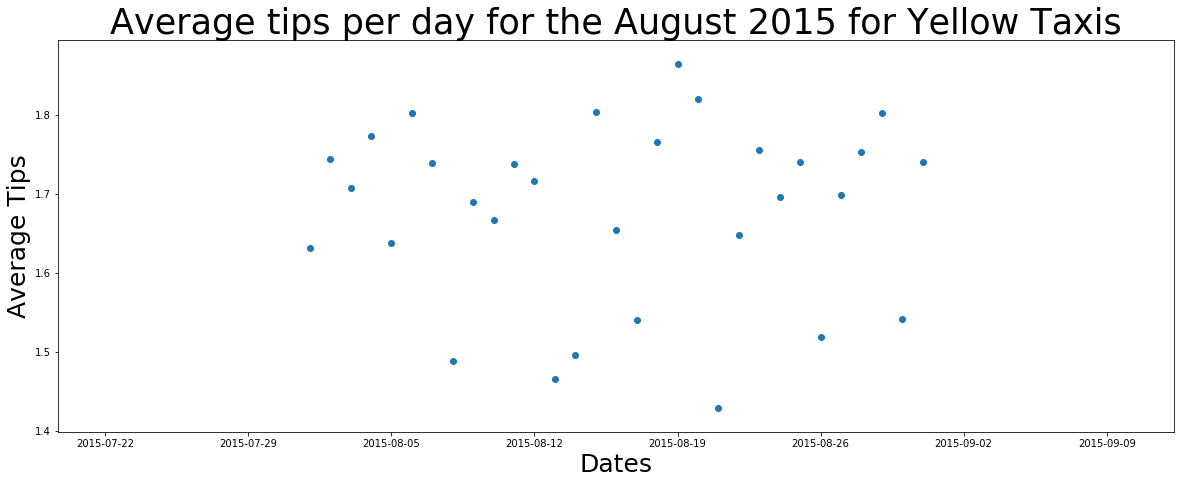

In [28]:
plt.figure(figsize=(20,8))
plt.gcf().autofmt_xdate()
plt.title('Average tips per day for the August 2015 for Yellow Taxis',fontsize=35)
#plt.plot(taxi_data.pickup_date.unique()
#         ,taxi_data.groupby(['pickup_date'], sort=True)['tip_amount'].mean(),'o')
#taxi_data.groupby(['pickup_date'], sort=True)['tip_amount'].mean().plot()
plt.scatter(taxi_data.pickup_date.unique()
         ,taxi_data.groupby(['pickup_date'], sort=True)['tip_amount'].mean())
plt.xlabel('Dates', fontsize=25)
plt.ylabel('Average Tips', fontsize=25)
plt.show()